*This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University.
Original versions were created by Asa Ben-Hur.
The content is availabe [on GitHub](https://github.com/asabenhur/CS345).*

*The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*

<img style="padding: 10px; float:right;" alt="CC-BY-SA icon.svg in public domain" src="https://upload.wikimedia.org/wikipedia/commons/d/d0/CC-BY-SA_icon.svg" width="125">


<a href="https://colab.research.google.com/github//asabenhur/CS345/blob/master/notebooks/module1_04_vectors_dot_products.ipynb">
  <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [36]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%autosave 0

Autosave disabled


In [18]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']=150

In [19]:
from matplotlib.ticker import MaxNLocator
def axes_at_zero(ax):
    """helper to make the axes go through (0,0)"""
    ax.spines['left'].set_position(('data', 0.0))
    ax.spines['bottom'].set_position(('data', 0.0))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_aspect('equal')

# Vectors, Geometry, and Dot Products


## Vectors and their Geometry


Fundamentally, a vector is a list of numbers such as the Python list below.

In [ ]:
v = [1, 7, 0, 1]

In this course we will represent vectors as Numpy arrays:

In [ ]:
v = np.array([1, 7, 0, 1])
v

In math, a vector is written as a *column*:
$$
\mathbf{v} = \begin{bmatrix}1\\7\\0\\1\end{bmatrix}.
$$

We can also express a vector as the transpose of a *row* vector:

$$
\mathbf{v}^\top = \begin{bmatrix}1 & 7 & 0 & 1\end{bmatrix}.
$$ 

However, there is more to a vector than an array of numbers:  a vector can be interpreted as a point in space, or as a direction.

Given a vector, the first interpretation 
that we present is as a **point in space**. 
In two or three dimensions, we can visualize these points 
by using the components of the vector to define 
the location of the points in space relative 
to a fixed reference called the *origin*.  

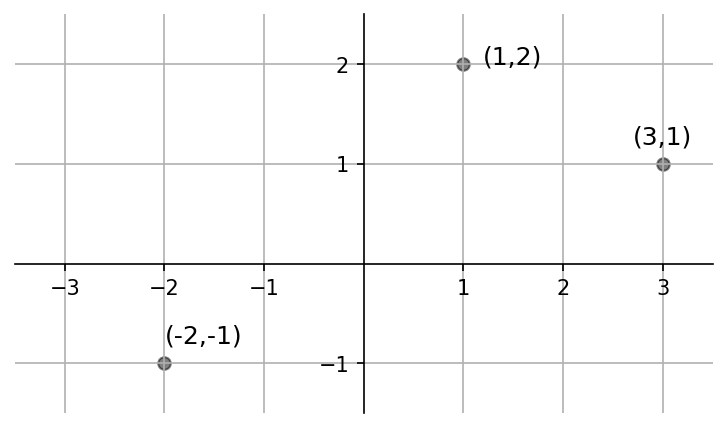

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(1,2, c='k', alpha=0.5);
plt.text(1.2,2, '(1,2)', fontsize = 12)
plt.scatter(3,1, c='k', alpha=0.5);
plt.text(2.7,1.2, '(3,1)', fontsize = 12)
plt.scatter(-2,-1, c='k', alpha=0.5);
plt.text(-2,-0.8, '(-2,-1)', fontsize = 12)
plt.ylim(-1.5,2.5);
plt.xlim(-3.5,3.5);
axes_at_zero(ax)
plt.grid()


This geometric point of view allows us to consider the problem of data classification on a more abstract level.
No longer faced with some insurmountable seeming problem 
like classifying pictures as either cats or dogs,
we can start considering tasks abstractly 
as collections of points in space and picturing the task 
as discovering how to separate two distinct clusters of points.

There is a second point of view of vectors: as **directions** in space. 
In this way, we consider all the vectors in the figure below as being the same.

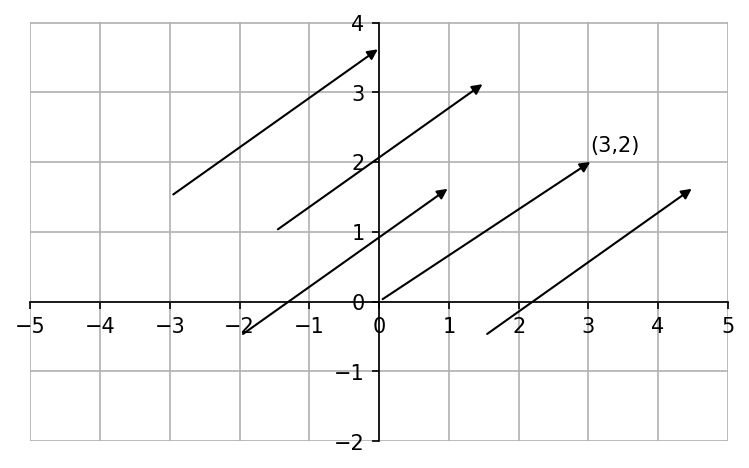

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.annotate("(3,2)", xy =(0,0), xytext=(3.03,2.15), arrowprops=dict(facecolor='black', arrowstyle='<|-'));
plt.annotate("", xy =(1.5,-0.5), xytext=(4.53,1.65), arrowprops=dict(facecolor='black', arrowstyle='<|-'));
plt.annotate("", xy =(-2,-0.5), xytext=(1.03,1.65), arrowprops=dict(facecolor='black', arrowstyle='<|-'));
plt.annotate("", xy =(-1.5,1), xytext=(1.53,3.15), arrowprops=dict(facecolor='black', arrowstyle='<|-'));
plt.annotate("", xy =(-3,1.5), xytext=(0.03,3.65), arrowprops=dict(facecolor='black', arrowstyle='<|-'));

plt.ylim(-2,4);
plt.xlim(-5,5);
axes_at_zero(ax)
plt.grid()

### Vector addition

Vectors of same size can be added together. Addition is performed *elementwise*:


In [7]:
u = np.array([2, 5])
v = np.array([3, 1])

print(" ", u)
print("+", v)
print("-"*10)
u + v

  [2 5]
+ [3 1]
----------


array([5, 6])

Keep in mind that the `+` operator for Python lists does something else altogether!

The geometric view of vectors helps us make visual sense of vector addition: we follow the direction given by one vector, and then follow the direction given by the other:

In [24]:
def plot_vector(vector, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector[0], vector[1],
              head_width=0.1, head_length=0.2, length_includes_head=True,
              **options)

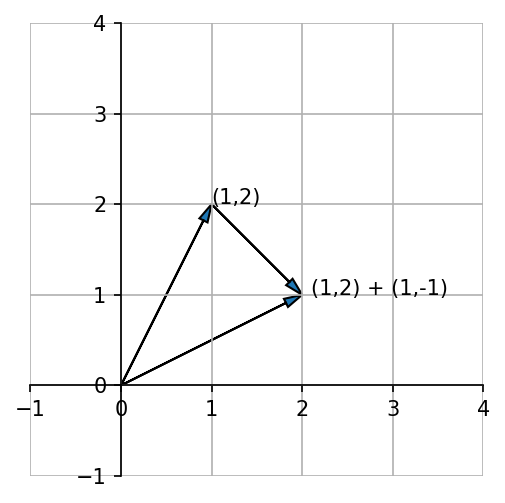

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)

u = np.array([1, 2])
v = np.array([1, -1])

plot_vector(u)
plot_vector(v, origin=u)
plot_vector(u+v)

plt.text(1,2, "(1,2)");
plt.text(2.1,1, "(1,2) + (1,-1)")

plt.ylim(-1,4);
plt.xlim(-1,4);
plt.grid()
axes_at_zero(ax)


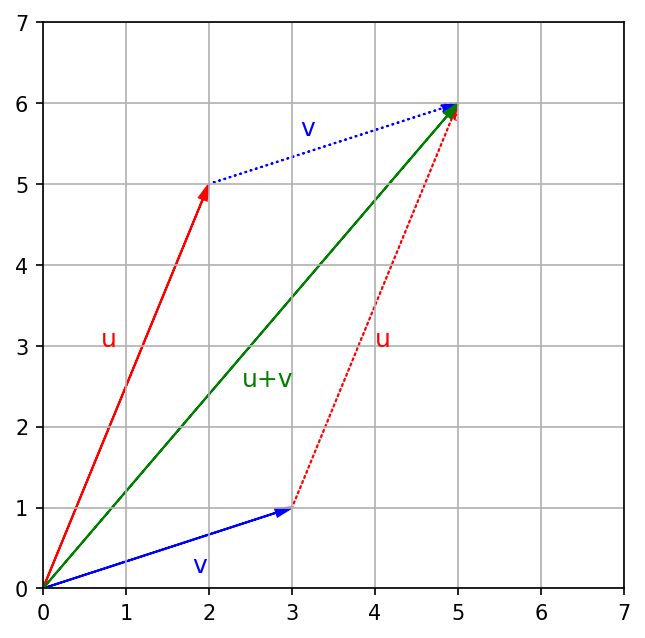

In [25]:
u = np.array([2, 5])
v = np.array([3, 1])

plt.figure(figsize=(5,5))

plot_vector(u, color="r")
plot_vector(v, color="b")
plot_vector(v, origin=u, color="b", linestyle="dotted")
plot_vector(u, origin=v, color="r", linestyle="dotted")
plot_vector(u+v, color="g")

plt.axis([0, 7, 0, 7])
plt.text(0.7, 3, "u", color="r", fontsize=12)
plt.text(4, 3, "u", color="r", fontsize=12)
plt.text(1.8, 0.2, "v", color="b", fontsize=12)
plt.text(3.1, 5.6, "v", color="b", fontsize=12)
plt.text(2.4, 2.5, "u+v", color="g", fontsize=12)
plt.grid()

### Exercise:

* Given a vector $\mathbf{v}$, what is the direction given by $-\mathbf{v}$?

Vector subtraction has a similar interpretation that follows from the following identity:

$$ \mathbf{u} - \mathbf{v} = \mathbf{u} + (\mathbf{-v}) $$

By considering the identity that $\mathbf{u} = \mathbf{v} + (\mathbf{u}-\mathbf{v})$,
we see that the vector $\mathbf{u}-\mathbf{v}$ is the direction 
that takes us from the point $\mathbf{u}$ to the point $\mathbf{v}$.

### Multiplication by a scalar

A vector can be multiplied by a scalar (i.e. number).  All elements of the vector are multiplied by that number:


In [28]:
u = np.array([2, 5])

number = 1.5
print(number, " * ", u, "=")

number * u

1.5  *  [2 5] =


array([3. , 7.5])

Let's get an intuition of what scalar multiplication does:

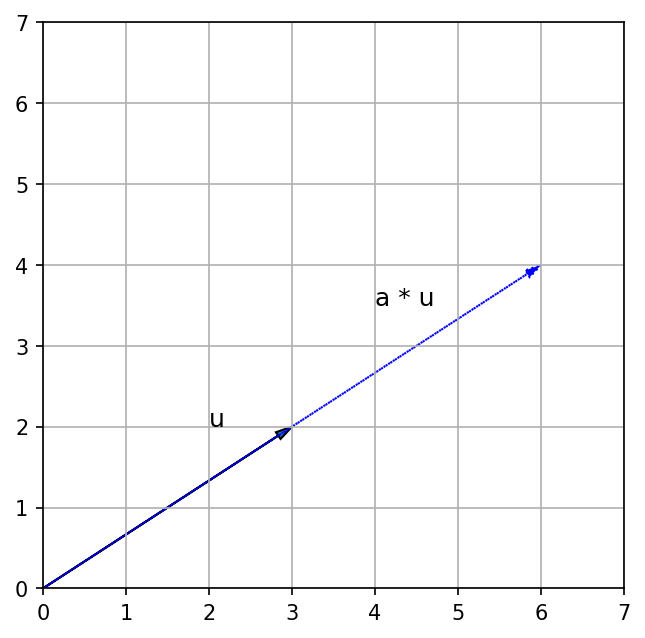

In [33]:
u = np.array([3, 2])
a = 2

plt.figure(figsize=(5,5))

plot_vector(u)
plot_vector(a * u, color="b", linestyle="dotted")
plt.text(2, 2, "u", color="k", fontsize=12)
plt.text(4, 3.5, "a * u", color="k", fontsize=12)
plt.axis([0, 7, 0, 7])
plt.grid()

## The norm of a vector

The length of a vector in two dimensions $\mathbf{v} = [v_1, v_2]^\top$ is given by $\sqrt{v_1^2 + v_2^2}$.  This is a simple application of the Pythagorean theorem.
See for example:

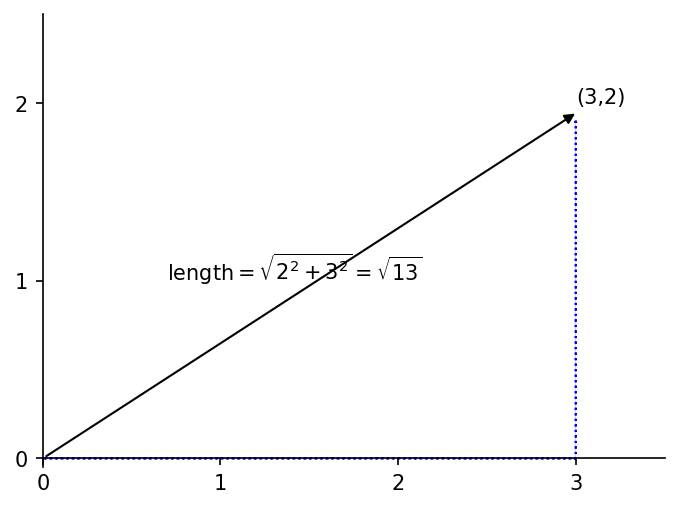

In [9]:
#plt.xkcd(scale=0, randomness=2)
fig=plt.figure()
ax = fig.add_subplot(111)
plt.annotate("(3,2)", xy =(0,0), xytext=(3,2), arrowprops=dict(facecolor='black', arrowstyle='<|-'));
plt.ylim(-0.05,2.5);
plt.xlim(0,3.5);
plt.arrow(3,0,0,1.9, width=0.001,length_includes_head=True, alpha=1,linestyle=':',color='b');
plt.arrow(0,0,3,0, width=0.001,length_includes_head=True, alpha=1,linestyle=':',color='b');
plt.text(0.7,1.0 , r'$\mathrm{length} = \sqrt{2^2+3^2}=\sqrt{13}$');
axes_at_zero(ax)


For a vector in $d$ dimensions the length or **norm** of a vector is given by:

$$
||\mathbf{v}|| = \sqrt{\sum_{i=1}^d v_i^2},
$$
where $\mathbf{v} = [v_1, v_2,\ldots,v_d]^\top$.

This is such a common operation that Numpy has a special command for it:

In [ ]:
np.linalg.norm(np.array([1,3]))

### Exercise:

* Write pure Python code that verifies that `np.linalg.norm` is giving the expected result.

In [ ]:
def norm(a_list) :
    """
    Compute the norm of the given vector, provided as a python list
    """
    return 0

norm([1,3])

### Unit vectors

A vector with a norm equal to 1 is called a **unit vector**.

Given a vector $\mathbf{u}$ it is easy to make it into a unit vector by dividing by its norm:

$$
\hat{\mathbf{u}} = \frac{\mathbf{u}}{||\mathbf{u}||}
$$

This operation is called *normalization*.  It produces a vector that points in the same direction of the original vector.

### Exercise:

Write code for converting a vector to a unit vector.  Verify graphically that you obtained the expected result.

In [35]:
def normalize(vector):
    return vector

# plot a vector before/after normalization

## The dot product

The **dot product** between two vectors $\mathbf{u}$ and $\mathbf{v}$ is defined as:

$$\mathbf{u}^\top\mathbf{v} = \sum_i u_i v_i.$$

The dot product is often represented using the *dot* operator:

$$
\mathbf{u}\cdot\mathbf{v} = \mathbf{u}^\top\mathbf{v} = \mathbf{v}^\top\mathbf{u}.
$$

And note that the dot product is symmetric, i.e. does not depend on the order of its operands.

You can compute the dot product using Numpy:

In [ ]:
u = np.array([1, 0, 1])
v = np.array([0, -1, 2])
np.dot(u,v)

The `dot` function can be invoked as a method or using the `@` operator:

In [ ]:
print(u.dot(v), u @ v)

And to round things off, here's a pure Python implementation:

In [ ]:
u = [1, 0, 1]
v = [0, -1, 2]
sum(a*b for a,b in zip(u,v))

### Exercise

What does the `*` operator do when applied between vectors represented as numpy arrays?


In [ ]:
## define two numpy arrays of the same length and 
## verify what is the result of multiplying them using
## the * operator

### Geometric interpretation

The dot product also admits a geometric interpretation: it is closely related to the angle between two vectors.

First we'll define the notion of a *unit vector*.
A **unit vector** is a vector whose norm is equal to 1, i.e. $\mathbf{u}$ such that $||\mathbf{u}|| = 1$.  We usually denote a unit vector as $\hat{\mathbf{u}}$.

We'll start by considering the dot product between two unit vectors in two dimensions.

We'll show that the dot product of two unit vectors is equal to the consine of the angle between them.
To demonstrate that, let us consider:

$$
\hat{\mathbf{u}} = [1,0]^\top \; \text{and} \; \hat{\mathbf{v}} = [\cos(\theta), \sin(\theta)]^\top.
$$
The vector $\mathbf{u}$ is parallel to the $x$-axis, 
and the vector $\mathbf{v}$ has a length $s$ and is at an angle $\theta$ with respect to the $x$-axis. 

By the definition of the Euclidean dot product:
$$
\hat{\mathbf{u}}\cdot\hat{\mathbf{v}} = \cos(\theta)
$$

Now, every vector $\mathbf{u}$ can be expressed as:
$$
\mathbf{u} = ||\mathbf{u}|| \hat{\mathbf{u}},
$$
where $\hat{\mathbf{u}}$ is a unit vector in the direction of $\mathbf{u}$.  (Think of a vector as a direction, and the size of the step to take in that direction).

Using this property, we can now compute the dot product between any two vectors in two dimensions as:
$$
\mathbf{u}\cdot\mathbf{v} = ||\mathbf{u}|| \; ||\mathbf{v}|| \;\hat{\mathbf{u}}\cdot \hat{\mathbf{v}} = ||\mathbf{u}|| \; ||\mathbf{v}|| \cos(\theta)
$$

This fact is true in [general](https://en.wikipedia.org/wiki/Dot_product), i.e. for vectors in any dimension and orientation.

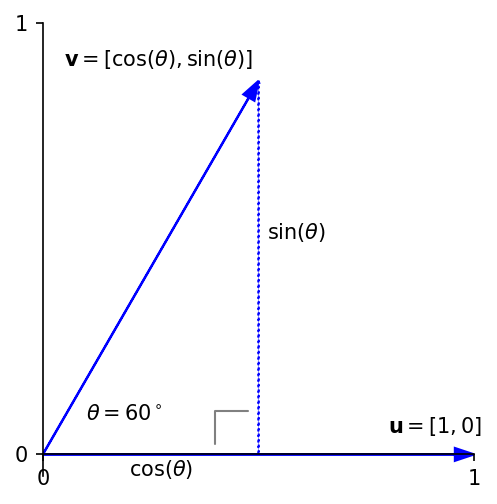

In [64]:
#plt.xkcd(scale=0., randomness=2)
fig = plt.figure()#figsize=(3,3))
ax = fig.add_subplot(111)
ax.arrow(0,0,0.5,0.866, width=0.001, head_width=0.03, length_includes_head=True, alpha=1, linestyle='-',color='b');
plt.ylim(-0.05,1);
plt.xlim(0,1);
ax.arrow(0,0,1,0, width=0.001, head_width=0.03, length_includes_head=True, alpha=1, linestyle='-',color='b');
ax.arrow(0.5,0,0,0.866, width=0.001,length_includes_head=True, alpha=1,linestyle=':',color='b');
ax.text(0.8, 0.05, r'$\mathbf{u}=[1,0]$')
ax.text(0.05, 0.9, r'$\mathbf{v}=[\cos(\theta), \sin(\theta)]$')
plt.text(0.1,0.08 , r'$\theta = 60^\circ$');
plt.text(0.52, 0.5, r'$\sin(\theta)$');
plt.text(0.2, -0.05, r'$\cos(\theta)$');

ax.annotate("", xy=(0.4, 0), xycoords='data', xytext=(0.5, 0.1), textcoords='data',
            arrowprops=dict(arrowstyle="-", color="0.5", shrinkA=5, shrinkB=5, patchA=None, patchB=None, connectionstyle="angle,angleA=0,angleB=90,rad=0"))
axes_at_zero(ax)

### Orthogonality

Vectors for which the dot product is equal to zero are called **orthogonal**.

### Questions

* What is the angle between orthogonal vectors?

* What can you say about the angle between vectors that have positive coefficients?

* Express the norm of a vector in using dot products.

To help you with this here's a plot of the sine and cosine functions:

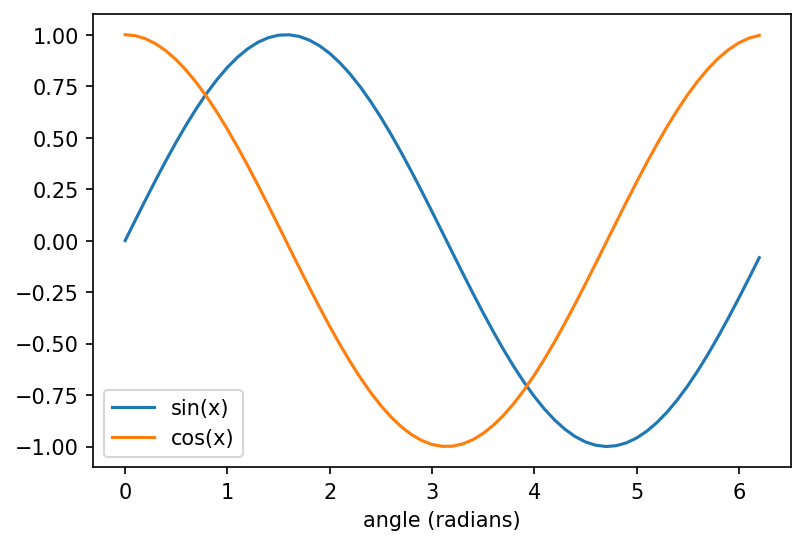

In [65]:
x = np.arange(0,2*np.pi,0.1)
y = np.sin(x)
z = np.cos(x)
plt.plot(x,y,x,z)
plt.xlabel('angle (radians)')
plt.legend(['sin(x)', 'cos(x)']);

It is reasonable to ask: why is computing the angle useful?
The answer comes in the kind of invariance we expect data to have. 
Consider an image, and a duplicate image,
where every pixel value is the same but $10\%$ the brightness. 
The values of the individual pixels are in general far from the original values.
Thus, if one computed the distance between the original image and the darker one, 
the distance can be large.  
However, for most ML applications, the *content* is the same---it is still 
an image of a cat as far as a cat/dog classifier is concerned. 
However, if we consider the angle, it is not hard to see 
that for any vector $\mathbf{v}$, the angle 
between $\mathbf{v}$ and $0.1\cdot\mathbf{v}$ is zero.
This corresponds to the fact that scaling vectors 
keeps the same direction and just changes the length.
The angle considers the darker image identical.  

Examples like this are everywhere.
In text, we might want the topic being discussed
to not change if we write twice as long of document that says the same thing.
For some encoding (such as counting the number of occurrences of words in some vocabulary), this corresponds to a doubling of the vector encoding the document, so again we can use the angle.

### Cosine Similarity

In ML contexts where the angle is employed 
to measure the closeness of two vectors, 
practitioners adopt the term *cosine similarity* 
to refer to the portion 
$$
\cos(\theta) = \frac{\mathbf{v}\cdot\mathbf{w}}{\|\mathbf{v}\|\|\mathbf{w}\|}.
$$

The cosine takes a maximum value of $1$ 
when the two vectors point in the same direction,
a minimum value of $-1$ when they point in opposite directions,
and a value of $0$ when the two vectors are orthogonal.
Note that if the components of high-dimensional vectors
are sampled randomly with mean $0$,
their cosine will nearly always be close to $0$.

### Exercise

* Write code that computes the cosine between two vectors with an arbitrary number of dimensions.  You may use Numpy for this task.
Use your code to compute the angle between
$$
\mathbf{u} = \begin{bmatrix}
1 \\ 0 \\ -1 \\ 2
\end{bmatrix}, \qquad  \mathbf{v} = \begin{bmatrix}
3 \\ 1 \\ 0 \\ 1
\end{bmatrix}
$$

In [ ]:
def cosine(u, v) :
    return 0

## Summary

* Vectors can be interpreted geometrically as either points or directions in space.
* Dot products define the notion of angle between vectors of arbitrary dimensions.

